# Assignment 4:

Completed by: JKtours (jlk635)

Test if the distribution of 
    
1) trip duration of bikers that ride during the day vs night
    
2) age of bikers for trips originating in Manhattan and in Brooklyn
    
are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
For the KS do the test with the entire dataset and with a subset 200 times smaller
    
Choose a single significant threshold for the whole exercise. 
    
For each test phrase the Null Hypothesis in words.
    
Describe the return of the scipy function you use in each case.
    
State the result in terms of rejection of the Null.

In [1]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV
import scipy.stats
from geopy.geocoders import Nominatim

%pylab inline

import os

Populating the interactive namespace from numpy and matplotlib


# Read in data

I'm reading in data from Jan 2015 and Feb 2015 and combine the datasets (using concat which stacks the two dataframes), before the analysis (ignore Summer and Winter references).

In [2]:
datestringSummer = '201501'
getCitiBikeCSV(datestringSummer)

('Downloading', '201501')
file in place, you can continue


In [3]:
dfSummer = pd.read_csv(os.getenv("PUIDATA") + "/" + datestringSummer + '-citibike-tripdata.csv')
dfSummer.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [4]:
dfSummer.shape

(285552, 15)

In [5]:
datestringWinter = '201502'
getCitiBikeCSV(datestringWinter)

('Downloading', '201502')
file in place, you can continue


In [6]:
dfWinter = pd.read_csv(os.getenv("PUIDATA") + "/" + datestringWinter + '-citibike-tripdata.csv')
dfWinter.head()


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1


In [7]:
dfWinter.shape

(196930, 15)

In [8]:
stack = [dfSummer, dfWinter]

dfBikes = pd.concat(stack, ignore_index=True)
dfBikes.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [9]:
# Review and check files have the same number of records

print("CHECK: Size of combined dataset is {}; and sum of rows in Summer and Winter dataset is: {}").format(dfBikes.shape,  dfSummer.shape[0] + dfWinter.shape[0])   

CHECK: Size of combined dataset is (482482, 15); and sum of rows in Summer and Winter dataset is: 482482


# Trip duration analysis

We are interested in whether the trip duration of riders varies depending on if they ride during the day or in the evening:

**H0: there is no statistical difference in the duration of trips for riders during the day, compared with the night (day is defined as startime between 7am and 7pm (otherwise night))**
$$ \alpha = 0.05 $$

Create a new variables for Day Duration (between 7am and 7pm) and Night Duration (7pm to 7am)




In [10]:
### NOTE: I'm creating a subset of the data (20,000 records) here to make easier to manage from computational standpoint. 
### If I had more time, I would delete this row and re-run on the whole sample (it's half a million records)
dfBikes = dfBikes.sample(20000, replace=False)

In [11]:
### FOR REMOVAL

dfBikes.shape

(20000, 15)

In [12]:
### FOR REMOVAL

dfBikes.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
278221,892,1/30/2015 17:52,1/30/2015 18:07,488,W 39 St & 9 Ave,40.756458,-73.993722,402,Broadway & E 22 St,40.740343,-73.989551,21007,Subscriber,1975.0,1
166642,354,1/19/2015 11:30,1/19/2015 11:36,310,State St & Smith St,40.689269,-73.989129,298,3 Ave & Schermerhorn St,40.686832,-73.979677,19632,Subscriber,1984.0,1
159312,380,1/17/2015 16:01,1/17/2015 16:07,483,E 12 St & 3 Ave,40.732233,-73.988900,317,E 6 St & Avenue B,40.724537,-73.981854,16611,Subscriber,1983.0,2
221660,765,1/22/2015 23:19,1/22/2015 23:32,509,9 Ave & W 22 St,40.745497,-74.001971,174,E 25 St & 1 Ave,40.738177,-73.977387,18350,Subscriber,1989.0,1
176258,527,1/20/2015 7:49,1/20/2015 7:58,537,Lexington Ave & E 24 St,40.740259,-73.984092,442,W 27 St & 7 Ave,40.746647,-73.993915,18651,Subscriber,1963.0,1


In [13]:
dfBikes['date'] = pd.to_datetime(dfBikes['starttime'])

In [14]:
#Create new variables for Day Duration and Night Duration 4.02

dfBikes['DayDur'] = dfBikes['tripduration'][(dfBikes['date'].dt.hour >= 7) & (dfBikes['date'].dt.hour < 19)]
dfBikes['NightDur'] = dfBikes['tripduration'][(dfBikes['date'].dt.hour < 7) | (dfBikes['date'].dt.hour >= 19)]

In [15]:
dfBikes.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,DayDur,NightDur
278221,892,1/30/2015 17:52,1/30/2015 18:07,488,W 39 St & 9 Ave,40.756458,-73.993722,402,Broadway & E 22 St,40.740343,-73.989551,21007,Subscriber,1975.0,1,2015-01-30 17:52:00,892.0,NaN
166642,354,1/19/2015 11:30,1/19/2015 11:36,310,State St & Smith St,40.689269,-73.989129,298,3 Ave & Schermerhorn St,40.686832,-73.979677,19632,Subscriber,1984.0,1,2015-01-19 11:30:00,354.0,NaN
159312,380,1/17/2015 16:01,1/17/2015 16:07,483,E 12 St & 3 Ave,40.732233,-73.988900,317,E 6 St & Avenue B,40.724537,-73.981854,16611,Subscriber,1983.0,2,2015-01-17 16:01:00,380.0,NaN
221660,765,1/22/2015 23:19,1/22/2015 23:32,509,9 Ave & W 22 St,40.745497,-74.001971,174,E 25 St & 1 Ave,40.738177,-73.977387,18350,Subscriber,1989.0,1,2015-01-22 23:19:00,NaN,765.0
176258,527,1/20/2015 7:49,1/20/2015 7:58,537,Lexington Ave & E 24 St,40.740259,-73.984092,442,W 27 St & 7 Ave,40.746647,-73.993915,18651,Subscriber,1963.0,1,2015-01-20 07:49:00,527.0,NaN


In [16]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
dfBikes.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,DayDur,NightDur
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,19705.000000,20000.000000,15485.000000,4515.000000
mean,657.395400,442.584350,40.735672,-73.990270,438.208250,40.735504,-73.990503,18179.581500,1975.134382,1.161900,663.641912,635.971872
std,925.449301,329.910432,0.018739,0.011574,321.190592,0.018544,0.011641,2066.596187,11.475039,0.407181,837.679666,1177.657219
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1899.000000,0.000000,60.000000,66.000000
25%,336.000000,310.000000,40.722992,-73.998004,307.000000,40.723180,-73.998842,16419.000000,NaN,1.000000,NaN,NaN
50%,507.000000,417.000000,40.737815,-73.990093,417.000000,40.737262,-73.990741,18186.000000,NaN,1.000000,NaN,NaN
75%,768.250000,492.000000,40.750450,-73.981923,491.000000,40.750200,-73.981918,19921.250000,NaN,1.000000,NaN,NaN
max,41111.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21699.000000,1999.000000,2.000000,32278.000000,41111.000000


In [17]:
# dropping NaN values
dfBikes['DayDur'].dropna(inplace= True)
dfBikes['NightDur'].dropna(inplace= True)

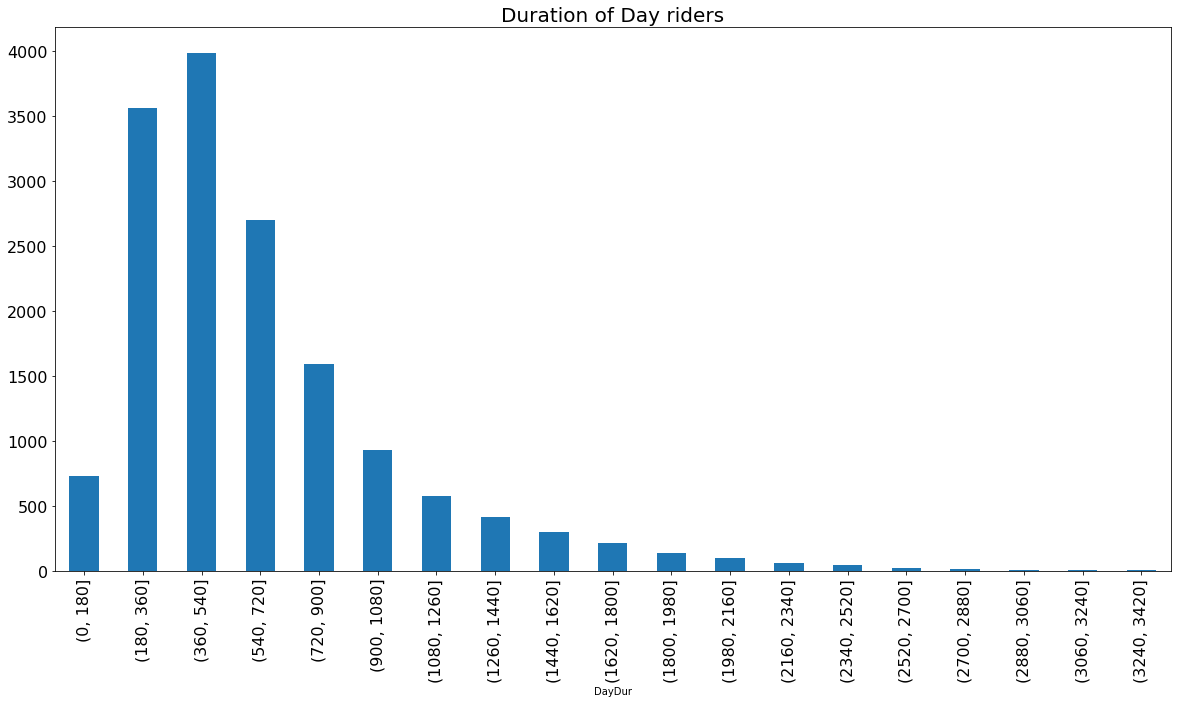

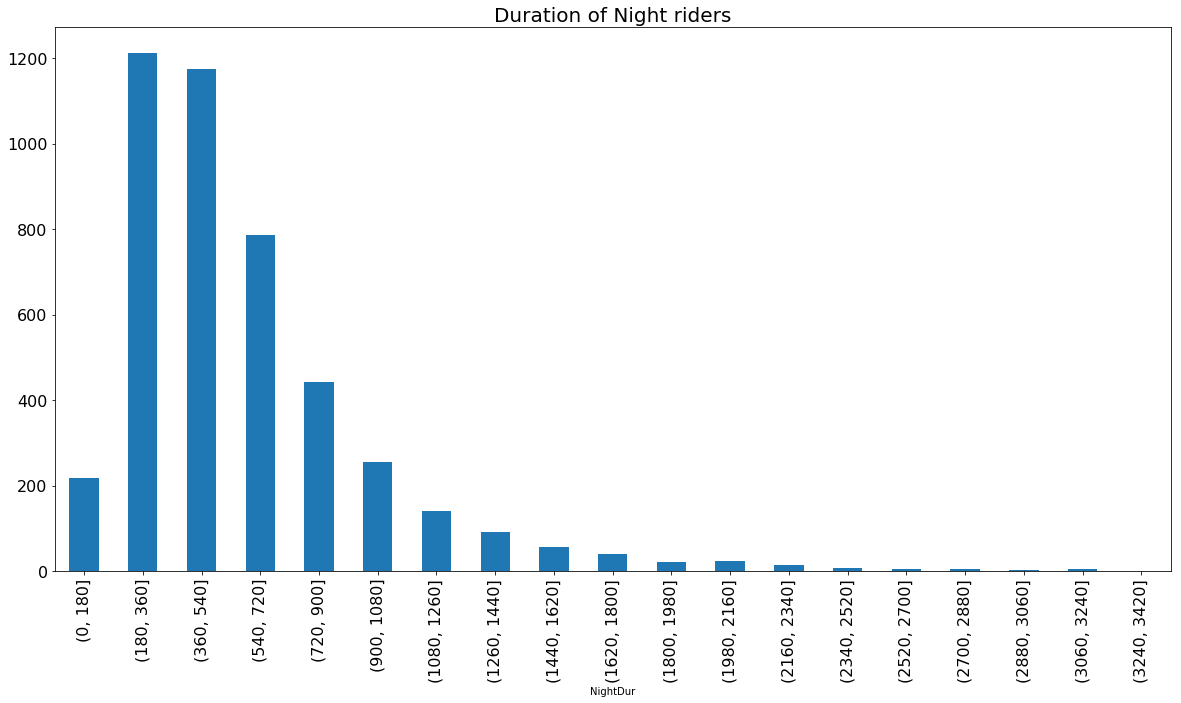

In [18]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(0, 3600, 180)



axDayDur = dfBikes.DayDur.groupby(pd.cut(dfBikes.DayDur, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                                    legend=False, figsize = (20,10), 
                                                                                          fontsize = 16)
axDayDur.set_title("Duration of Day riders", fontsize = 20)



axNightDur = dfBikes.NightDur.groupby(pd.cut(dfBikes.NightDur, bins)).agg([count_nonzero]).plot(kind='bar',
                                                               legend=False, figsize = (20,10),
                                                                                        fontsize = 16)
axNightDur.set_title("Duration of Night riders", fontsize = 20);

#### Figure 1: Histogram of Durations, showing count of number of people who travelled for each duration (indicated by the interval of the bins in seconds), split by day (DayDur) and night (NightDur)

              count_nonzero
DayDur                     
(0, 180]           0.000693
(180, 360]         0.038785
(360, 540]         0.041275
(540, 720]         0.040643
(720, 900]         0.035438
(900, 1080]        0.031892
(1080, 1260]       0.025808
(1260, 1440]       0.019080
(1440, 1620]       0.012486
(1620, 1800]       0.007718
(1800, 1980]       0.003722
(1980, 2160]       0.002700
(2160, 2340]       0.001596
(2340, 2520]       0.000141
(2520, 2700]       0.000110
(2700, 2880]       0.000028
(2880, 3060]       0.000111
(3060, 3240]       0.000324
(3240, 3420]       0.000000


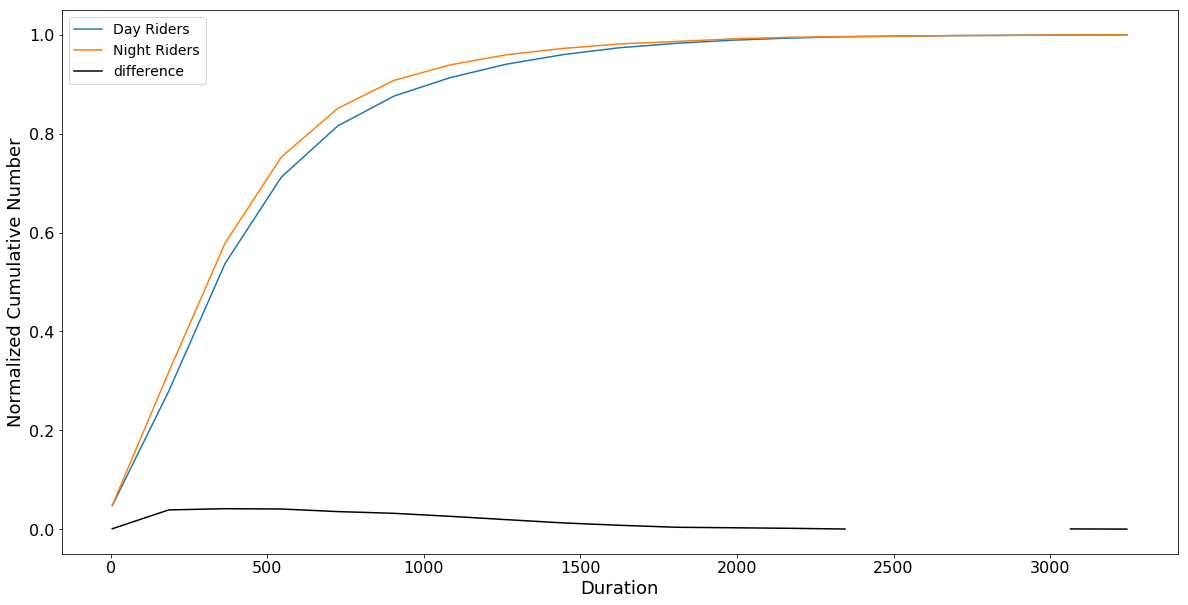

In [19]:
#print dfBikes.Dur, dfBikes.Dur.cumsum()

#dfBikes.DayDur

csDayDur=dfBikes.DayDur.groupby(pd.cut(dfBikes.DayDur, bins)).agg([count_nonzero]).cumsum()


csNightDur=dfBikes.NightDur.groupby(pd.cut(dfBikes.NightDur, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csDayDur / csDayDur.max()-csNightDur / csNightDur.max()))

plt.figure(figsize = (20,10))
plt.tick_params(axis='both',labelsize=16)
                                                                                
pl.plot(bins[:-1] + 5, csDayDur / csDayDur.max(), label = "Day Riders")
pl.plot(bins[:-1] + 5, csNightDur / csNightDur.max(), label = "Night Riders")
pl.plot(bins[:-1] + 5, np.sqrt(csNightDur / csNightDur.max() - csDayDur / csDayDur.max())**2, 'k-',
        label = "difference")
pl.xlabel("Duration", fontsize = 18)
pl.ylabel("Normalized Cumulative Number", fontsize = 18)
pl.legend(fontsize=14)

#### Figure 2: The cumulative distribution of CitiBike riders' Duration split by DayRiders (Blue) and NightRiders (Orange). The difference in cumulative distribution is also plotted, and the max difference is observed around 250 seconds.


## KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html




In [20]:

ks = scipy.stats.ks_2samp(dfBikes.DayDur, dfBikes.NightDur)

In [21]:
print(ks)

Ks_2sampResult(statistic=0.04810442427941635, pvalue=1.7611302177652156e-07)


The scipy KS test returned a test statistic of 0.0266 and a p-value of 2 x 10^-159 (i.e. really small). The very small p-value indicates we reject the null hypothesis. The NULL hypothesis is that the distributions of the two samples are the same - in this case we reject the null and conclude the distributions may be different.


In [22]:
numpy.random.seed(seed=999)

In [23]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS

RedactDay = int(dfBikes.DayDur.size / 200)
RedactNight = int(dfBikes.NightDur.size / 200)
#SampleSize = min(LenDay,LenNight)


sortRedactDayDur = sorted(numpy.random.choice(dfBikes.DayDur, size=RedactDay, replace=False))
sortRedactNightDur = sorted(numpy.random.choice(dfBikes.NightDur, size=RedactNight, replace=False))

In [24]:

ksRedact = scipy.stats.ks_2samp(sortRedactDayDur, sortRedactNightDur)

In [25]:
print(ksRedact )

Ks_2sampResult(statistic=0.1298701298701298, pvalue=0.91639891342923885)


The scipy KS test returned a test statistic of 0.0487 and a p-value of 0.0042. Again, the p-value is small and leads us to reject the null hypothesis that the distributions of the two samples are the same. I.e. conclude the two samples come from different distributions


## Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr


In [26]:
LenDay = dfBikes.DayDur.size
LenNight = dfBikes.NightDur.size
SampleSize = min(LenDay,LenNight)

sortRandDayDur = sorted(numpy.random.choice(dfBikes.DayDur, size=SampleSize, replace=False))
sortRandNightDur = sorted(numpy.random.choice(dfBikes.NightDur, size=SampleSize, replace=False))

In [27]:
scipy.stats.pearsonr(sortRandDayDur , sortRandNightDur)

(0.97000834976151584, 0.0)



The Pearson's correlation returned is 0.97623, and p-value returned is 0.0 (likely small, but non-zero if more decimal places were returned). The p-value returned if for a two-tailed test, assessing Null hypothesis of correlation = 0, v.s. two-sided alternative of correlation not equal to zero.

In this case, with the very small p-value, we reject the null to conclude it is very unlikely the datapoints were generated from distributions with correlation equal to zero.


## Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [28]:
scipy.stats.spearmanr(sortRandDayDur , sortRandNightDur)

SpearmanrResult(correlation=0.99999806327979679, pvalue=0.0)

The Spearman's rank-order correlation returned is 0.99999, and p-value returned is 0.0 (likely small, but non-zero if more decimal places were returned). The p-value returned if for a two-tailed test, assessing Null hypothesis of correlation = 0, v.s. two-sided alternative of correlation not equal to zero.

In this case, with the very small p-value, we reject the null to conclude it is very unlikely the datapoints were generated from distributions with correlation equal to zero.



# AGE OF RIDERS FROM MANHATTAN AND BROOKLYN

H0: there is no statistical difference in the age distribution of riders from Manhattan and Brooklyn 

$$ \alpha = 0.05 $$



In [30]:
UniqueCoords =  dfBikes.drop([ 'tripduration', 'starttime', 'stoptime','start station id', 'start station name', 'end station id', 'end station name','end station latitude', 'end station longitude', 'bikeid','usertype', 'birth year', 'gender', 'date', 'DayDur', 'NightDur'],axis=1)
UniqueCoords = UniqueCoords.drop_duplicates(['start station longitude', 'start station latitude']).reset_index()
UniqueCoords.head()

,index,start station latitude,start station longitude
0,278221,40.756458,-73.993722
1,166642,40.689269,-73.989129
2,159312,40.732233,-73.988900
3,221660,40.745497,-74.001971
4,176258,40.740259,-73.984092


In [31]:
#UniqueCoords = UniqueCoords.drop(UniqueCoords.index[407]).reset_index()
#UniqueCoords = UniqueCoords.drop(UniqueCoords.index[423]).reset_index()

Sometimes Geocoder fails or disconnects. If so, run again.

In [32]:
geolocator = Nominatim()

UniqueCoords['Borough'] = np.nan


for i in range(UniqueCoords.shape[0]):
    
    address = geolocator.reverse(str(UniqueCoords['start station latitude'][i]) + ", " + str(UniqueCoords['start station longitude'][i])) 
    temp = str(address).split(',')
    #print(temp)
    if np.in1d(" New York County", temp):
        
        UniqueCoords['Borough'][i] = 'Manhattan'
    #   print("M")
    
    if np.in1d("  Manhattan", temp):
        UniqueCoords['Borough'][i] = 'Manhattan'    
    #  print("M")
    if np.in1d(" Kings County", temp):       
   
        UniqueCoords['Borough'][i] = 'Brooklyn'
       # print("B")

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [34]:
UniqueCoords =  UniqueCoords.drop(['index'],axis=1)
dfBikes = pd.merge(dfBikes, UniqueCoords, on=['start station latitude','start station longitude'], how='outer')
dfBikes.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,DayDur,NightDur,Borough
0,892,1/30/2015 17:52,1/30/2015 18:07,488,W 39 St & 9 Ave,40.756458,-73.993722,402,Broadway & E 22 St,40.740343,-73.989551,21007,Subscriber,1975.0,1,2015-01-30 17:52:00,892.0,NaN,Manhattan
1,425,2/3/2015 17:29,2/3/2015 17:36,488,W 39 St & 9 Ave,40.756458,-73.993722,509,9 Ave & W 22 St,40.745497,-74.001971,17461,Subscriber,1959.0,1,2015-02-03 17:29:00,425.0,NaN,Manhattan
2,494,2/13/2015 18:34,2/13/2015 18:43,488,W 39 St & 9 Ave,40.756458,-73.993722,422,W 59 St & 10 Ave,40.770513,-73.988038,16728,Subscriber,1985.0,1,2015-02-13 18:34:00,494.0,NaN,Manhattan
3,202,1/20/2015 13:29,1/20/2015 13:33,488,W 39 St & 9 Ave,40.756458,-73.993722,490,8 Ave & W 33 St,40.751551,-73.993934,17181,Subscriber,1981.0,1,2015-01-20 13:29:00,202.0,NaN,Manhattan
4,554,1/7/2015 17:56,1/7/2015 18:06,488,W 39 St & 9 Ave,40.756458,-73.993722,446,W 24 St & 7 Ave,40.744876,-73.995299,16628,Subscriber,1987.0,1,2015-01-07 17:56:00,554.0,NaN,Manhattan


In [35]:
dfBikes['age'] = 2015 - dfBikes['birth year']

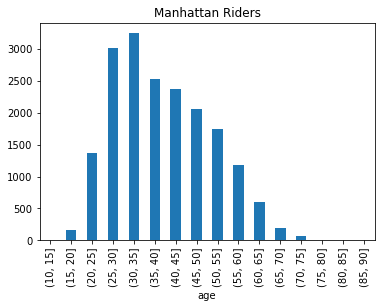

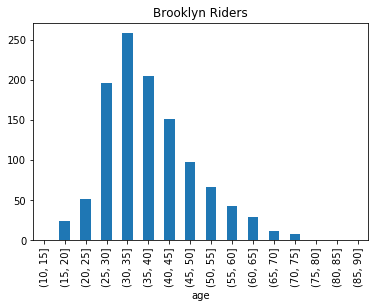

In [36]:
binss = np.arange(10,95,5)

ManhattanTemp = dfBikes[dfBikes['Borough'] == "Manhattan"]
Manhattan = ManhattanTemp['age'].groupby(pd.cut(ManhattanTemp.age, binss)).agg([count_nonzero]).plot(kind='bar', legend=False)
Manhattan.set_title("Manhattan Riders")


BrooklynTemp = dfBikes[dfBikes['Borough'] == "Brooklyn"]
Brooklyn = BrooklynTemp['age'].groupby(pd.cut(BrooklynTemp.age, binss)).agg([count_nonzero]).plot(kind='bar', legend=False)
Brooklyn.set_title("Brooklyn Riders")

          count_nonzero
age                    
(10, 15]       0.000000
(15, 20]       0.012232
(20, 25]       0.016384
(25, 30]       0.007066
(30, 35]       0.043879
(35, 40]       0.087483
(40, 45]       0.091993
(45, 50]       0.065707
(50, 55]       0.030072
(55, 60]       0.004514
(60, 65]       0.002478
(65, 70]       0.002048
(70, 75]       0.000916
(75, 80]       0.000269
(80, 85]       0.000000
(85, 90]       0.000000


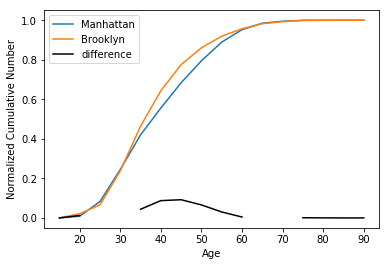

In [37]:


csMN=ManhattanTemp['age'].groupby(pd.cut(ManhattanTemp.age, binss)).agg([count_nonzero]).cumsum()

csBK=BrooklynTemp['age'].groupby(pd.cut(BrooklynTemp.age, binss)).agg([count_nonzero]).cumsum()

print (np.abs(csMN / csMN.max()-csBK / csBK.max()))

pl.plot(binss[:-1] + 5, csMN / csMN.max(), label = "Manhattan")
pl.plot(binss[:-1] + 5, csBK / csBK.max(), label = "Brooklyn")
pl.plot(binss[:-1] + 5, np.sqrt(csBK / csBK.max() - csMN / csMN.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()



## KS tests to compare 2 sample

In [38]:
ks = scipy.stats.ks_2samp(ManhattanTemp['age'][~np.isnan(ManhattanTemp['age'])], BrooklynTemp['age'][~np.isnan(BrooklynTemp['age'])])
print (ks)

Ks_2sampResult(statistic=0.11925696683220713, pvalue=8.1478583986211961e-14)




The test statistic is 12% highlighting differences between the two distributions.

The p-value is 0 indicating we reject the null hypothesis that the samples come from the same distribution

## Pearson's test for correlation

In [39]:
ManhattanTemp['age'].dropna(inplace= True)
BrooklynTemp['age'].dropna(inplace= True)

if len(BrooklynTemp['age']) < len(ManhattanTemp['age']):
    length = len(BrooklynTemp['age'])
else:
    length = len(ManhattanTemp['age'])
    
np.random.seed(100)
pearson_age_Manhattan = np.sort(np.random.choice(ManhattanTemp['age'], length, replace=False))
pearson_age_Brooklyn = np.sort(np.random.choice(BrooklynTemp['age'], length, replace=False))

pearson = scipy.stats.pearsonr(pearson_age_Manhattan,pearson_age_Brooklyn)
print(pearson)

(0.9881588333740301, 0.0)


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/series.py:2571: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


Pearsons correlation is calculated as 0.988 indicating a very high positive correlation between the two samples. The p-value is very small (almost zero), indicating we reject the null hypothesis that correlation equals zero (two-tailed test)

## Spearman's test for correlation

In [40]:
spearman = scipy.stats.spearmanr(pearson_age_Manhattan,pearson_age_Brooklyn)
print(spearman)


SpearmanrResult(correlation=0.9989379794704063, pvalue=0.0)


Spearmans rank correlation value of 0.998 indicates again very high correlation between the two samples. The p-value again close to zero indicates we reject the null hypothesis that spearmans rank correlation equals zero (a two-tailed test)